<a href="https://colab.research.google.com/github/AlexR9AZ/PHP_mix/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22MNIST_(%D0%94%D0%BB%D1%8F_%D1%81%D0%BB%D1%83%D1%88%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9)_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST

В этом ноутбуке мы с вами будем работать с датасетом [MNIST](https://www.kaggle.com/c/digit-recognizer/overview) ("Modified National Institute of Standards and Technology"), который можно назвать аналогом "hello world" в сфере компьютерного зрения. MNIST был выпущен в 1999 году, но до сих пор остается отличным датасетом для проверки того или иного алгоритма классификации.

В MNIST содержатся изображения рукописных цифр (от 0 до 9), поэтому зачастую на этом датасете решают задачу классификации на 10 классов.

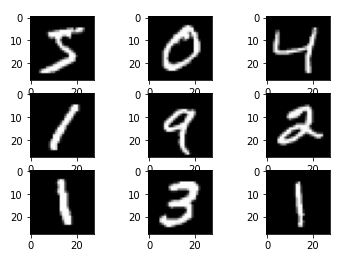

#План действий

1. Импортируем все необходимые библиотеки и функции для работы над нашей задачей. В библиотеках языка программирования Python содержатся необходимые программы для анализа и визуализации данных. Таким образом, мы можем не "изобретать велосипед" и не писать все программы и функции с нуля, а воспользоваться уже готовыми решениями;

2. Загрузим данные MNIST и познакомимся с Kaggle;

3. Визуализируем данные, чтобы познакомиться с ними. Визуализация - очень важный этап предварительной работы над любой Data Science задачей;

4. Подготовим наши данные к подаче в нейронную сеть;

5. Обучим нейронную сеть;

6. Посмотрим, насколько качественно наша нейронная сеть классифицирует картинки;

7. Подумаем, что можно сделать для улучшения качества нашей модели.

**Как определить качество полученной модели?**

Для этого используются **метрики машинного обучения** - показатели, определяющие качество работы того или иного алгоритма машинного обучения (модели) на определенной задаче машинного обучения.

В данном случае наша задача машинного обучения - многоклассовая классификация на датасете MNIST, а алгоритм машинного обучения - сверточная нейронная сеть.

Так как мы решаем задачу классификации, то можем использовать такую метрику, как **accuracy**. Эта метрика **показывает общую точность нашей модели по всем имеющимся классам. Ее можно расчитать как отношение количества правильных прогнозов к их общему количеству**.
Accuracy принимает значение от 0 до 1. Чем большее значение принимает эта метрика, тем лучше! 

Пример: возьмем 9 картинок из датасета MNIST(см. картинку выше) 

Предположим, наша нейросеть правильно  распознала все цифры с этих картинок, кроме цифры 5 - она перепутала ее с тройкой. Тогда Accuracy нашей модели равен 8/9 (8 правильных распознанных цифр на 9 всех цифр в нашей выборке) или 0.88
А если все цифры будут распознаны верно, то accuracy равен 1. 


Таким образом, с помощью метрик машинного обучения Data Scientists понимают, насколько качественно работает та или иная модель. Также метрики используются для сравнения моделей между собой.

# Imports

Импортируем все библиотеки/функции, которые мы будем использовать в этом ноутбуке. Таким образом, наш код будет выглядеть гораздо чище.

In [ ]:
import os # системная библиотека, позволяющая работать с переменными среды
import pandas as pd # библиотека для работы с табличными данными
import numpy as np # библиотека с множеством математических функций
import matplotlib.pyplot as plt # библиотека для визуализации данных
import seaborn as sns # библиотека для визуализации данных

%matplotlib inline

In [ ]:
import keras # фреймворк для работы с нейронными сетями
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau 
from sklearn.model_selection import train_test_split # функция "разбиения" выборки на train и test
import tensorflow as tf # фреймворк для работы с нейронными сетями

# Выгрузка данных с платформы Kaggle

[Kaggle](https://kaggle.com) — это сообщество специалистов по Data Science. Здесь можно изучать машинное обучение, писать свои и разбирать чужие прогнозные модели, участвовать в соревнованиях и общаться с дата-сайентистами. Сервис полностью бесплатен.

In [ ]:
os.environ['KAGGLE_USERNAME'] = "soncaajp"
os.environ['KAGGLE_KEY'] = "3db4428f01c9696a8be1c7bc067de50b"

In [ ]:
! kaggle competitions download -c digit-recognizer

 55% 5.00M/9.16M [00:00<00:00, 15.0MB/s]
100% 9.16M/9.16M [00:00<00:00, 23.2MB/s]
 82% 5.00M/6.09M [00:00<00:00, 15.7MB/s]
100% 6.09M/6.09M [00:00<00:00, 17.5MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 108MB/s]


# Визуализация датасета

In [ ]:
train = pd.read_csv('train.csv.zip')
test = pd.read_csv('test.csv.zip')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
print('В тренировочной выборке {0} картинок.'.format(train.shape[0]))
print('В тестовой выборке {0} картинок.'.format(test.shape[0]))

В тренировочной выборке 42000 картинок.
В тестовой выборке 28000 картинок.


Проверим баланс классов. В машинном обучении важно, чтобы классы были сбалансированы (кол-во объектов разных классов было примерно одинаковым). В противном случае алгоритм может научиться угадывать только один из классов (класс большинство). 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


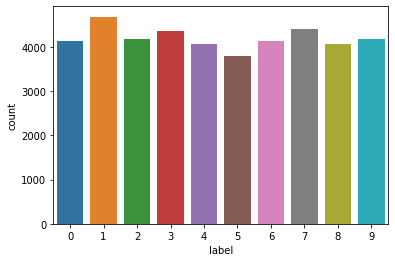

In [ ]:
sns.countplot(train['label'])

Визуализируем картинки из train части датасета.

In [ ]:
X_train = (train.drop(['label'], axis = 1).values).astype('float32')
y_train = (train.label.values).astype('int32')
X_test = (test.values).astype('float32')

In [ ]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

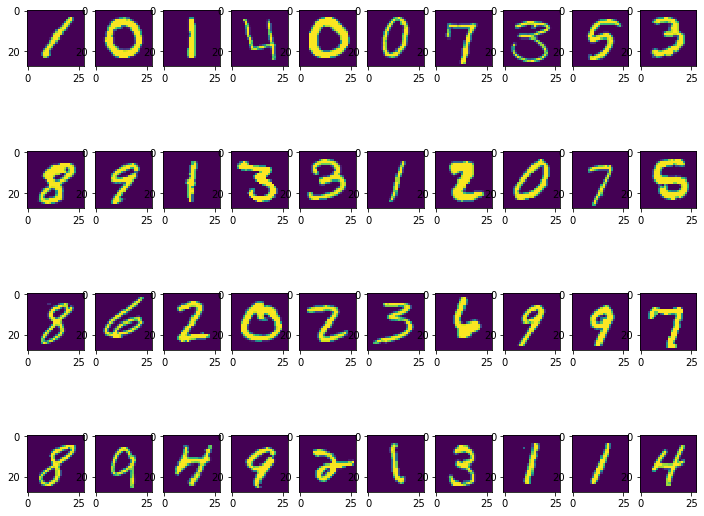

In [ ]:
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

# Подготовим данные для нейронной сети


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [ ]:
X_train.shape[0]

42000

# Создадим нейронную сеть

Зададим гиперпараметры.

In [ ]:
BATCH_SIZE = 64
NUM_CLASSES = 10
EPOCHS = 10
INPUT_SIZE = (28, 28, 1)

Предобработаем целевую переменную для удобной передачи в сеть.

In [ ]:
y_train = keras.utils.np_utils.to_categorical(y_train, NUM_CLASSES)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

Создадим архитектуру нейронной сети.

Вспомним презентацию. В сверточные сети обычно имеют следующую структуру:

*   Сверточный слой Conv
*   Сверточный слой Conv
*   Pooling слой
*   Полносвязный слой Dense
*   Dropout 
*   Полносвязный слой Dense

In [ ]:
model = Sequential()

#conv-conv-pool блок это 1 сверточный блок. Обычно их ТРИ, увеличение кол-ва слове не всегда выражается в увеличении качества, но всегда увеличивает время обучения
model.add(Conv2D(filters = 32, kernel_size =(5,5), padding = "same", activation = "relu", input_shape = (28, 28, 1)))# выделяем 32 признака, хотя мона и 8 64  
# от размера kernel_size =(5,5) зависит какую область будем рассматривать на наличие того или иного паттерна
#padding = "same" параметр, который позволит нам сохранять размерность изображения одинаковой до свертки и после свертки
# activation = "relu" нужна для того, чтобы наша нейронка вообще обучалась и значительно отличалась от линейной модели
# обычно в сверточном блоке этих сверток две (поэтому повтоярем строку, но без input_shape)
model.add(Conv2D(filters = 32, kernel_size =(5,5), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size =(2,2)))# понижаем размерность нашего изображения в два раза
model.add(Dropout(0.25))

#-----------2 блок----------копируем из верхнего и меняем число filters-----------------------------------------------------------------------------
#хотелось бы выделять больше низкоуровневых признаков поэтому делаем filters 64
model.add(Conv2D(filters = 64, kernel_size =(5,5), padding = "same", activation = "relu", input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 64, kernel_size =(5,5), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Dropout(0.25))

#-----------3 блок----------копируем из верхнего и меняем число filters-----------------------------------------------------------------------------
#хотелось бы выделять больше низкоуровневых признаков поэтому делаем filters 128
model.add(Conv2D(filters = 128, kernel_size =(5,5), padding = "same", activation = "relu", input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 128, kernel_size =(5,5), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Dropout(0.25))


# Теперь подадим эти признаки в нейронную сеть, которая и предскажет тот или иной класс
#Голова сети
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))#полносвязанная НС
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

Скопмилируем модель.

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.RMSprop(),
              metrics = ['accuracy'])

Добавим advanced технику для работы с learning rate.

In [ ]:
reduce_on_plateau = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [ ]:
# текстовое представление нейронной сети (послойное отображение)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

# Обучим сеть

In [ ]:
datagen = ImageDataGenerator()

In [ ]:
datagen.fit(X_train)
h = model.fit_generator(datagen.flow(X_train,y_train, batch_size = BATCH_SIZE),
                        epochs = EPOCHS, 
                        validation_data = (X_validation, y_validation),
                        verbose = 1, 
                        steps_per_epoch = X_train.shape[0] // BATCH_SIZE, 
                        callbacks=[reduce_on_plateau])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
525/525 [==============================] - 47s 28ms/step - loss: 0.4736 - accuracy: 0.8418 - val_loss: 0.0841 - val_accuracy: 0.9752
Epoch 2/10
525/525 [==============================] - 14s 27ms/step - loss: 0.0793 - accuracy: 0.9788 - val_loss: 0.0675 - val_accuracy: 0.9808
Epoch 3/10
525/525 [==============================] - 14s 27ms/step - loss: 0.0602 - accuracy: 0.9843 - val_loss: 0.0812 - val_accuracy: 0.9826
Epoch 4/10
525/525 [==============================] - 14s 27ms/step - loss: 0.0583 - accuracy: 0.9861 - val_loss: 0.0633 - val_accuracy: 0.9818
Epoch 5/10
525/525 [==============================] - 15s 28ms/step - loss: 0.0547 - accuracy: 0.9866 - val_loss: 0.0468 - val_accuracy: 0.9895
Epoch 6/10
525/525 [==============================] - 14s 27ms/step - loss: 0.0567 - accuracy: 0.9878 - val_loss: 0.0390 - val_accuracy: 0.9902
Epoch 7/10
525/525 [==============================] - 14s 27ms/step - loss: 0.0543 - accuracy: 0.9880 - val_loss: 0.0456 - val_accuracy:

In [ ]:
_, final_acc = model.evaluate(X_validation, y_validation, verbose=0)
print("Финальная accuracy: {0:.6f}".format(final_acc))

Финальная accuracy: 0.986310


Мы получили отличную accuracy. Наша нейронная сеть работает почти идеально.

#Визуализируем картинки, которые были классифицированы неправильно

In [ ]:
Y_pred = model.predict(X_validation)

Y_pred_classes = np.argmax(Y_pred, axis = 1) 

Y_true = np.argmax(y_validation, axis = 1) 

In [ ]:
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(6,6))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error], obs_errors[error]))
            n += 1

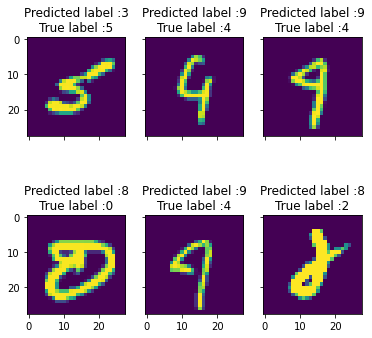

In [ ]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_validation[errors]


# Возьмем те картинки, где цифра была предсказана неверно, но модель была уверена в своем предсказании
Y_pred_errors_prob = np.max(Y_pred_errors, axis = 1)

# Посмотрим, какова была вероятность отнести эти картинки к другому - правильному классу
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Возьмем разность предсказанной вероятности неверного и истинного класса
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Отсортируем полученный список
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Возьмем топ 6 наиболее часто встречающихся ошибок
most_important_errors = sorted_dela_errors[-6:]


display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)
# сверху то, что предсказал сеть, а снизу истинный класс

#Возможные улучшения


*   Взять предобученную нейронную сеть и дообучить ее под эту задачу
*   Использовать композицию из нейронных сетей
*   Добавить больше слоев


In [ ]:
#Сохраним на диске данные
from google.colab import files
test.to_csv('file_name.csv') 
files.download('file_name.csv')#


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>